In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


<a class="anchor" id="0.1"></a>
# **Table of Contents**

1.	[Introduction to Random Forest algorithm](#1)
2.	[Advantages and disadvantages](#2)
3.	[Feature selection with Random Forests](#3)
4.	[Difference between Random Forests and Decision-Trees](#4)
5.	[Why to choose Random Forest over Decision-Trees](#5)
6.	[Data Reading](#6)
7.	[Exploratory data analysis](#7)
8.	[Split data into separate training and test set](#8)
9.	[Model Training](#9)


# **1. Introduction to Random Forest algorithm** 
<a class="anchor" id="1"></a>
    

The Random Forest algorithm is a versatile machine learning technique that combines multiple decision trees to form a powerful ensemble model. It is widely used for both classification and regression tasks. Each decision tree in the random forest is constructed on a different random subset of the training data, and predictions are made by aggregating the results of all the trees.

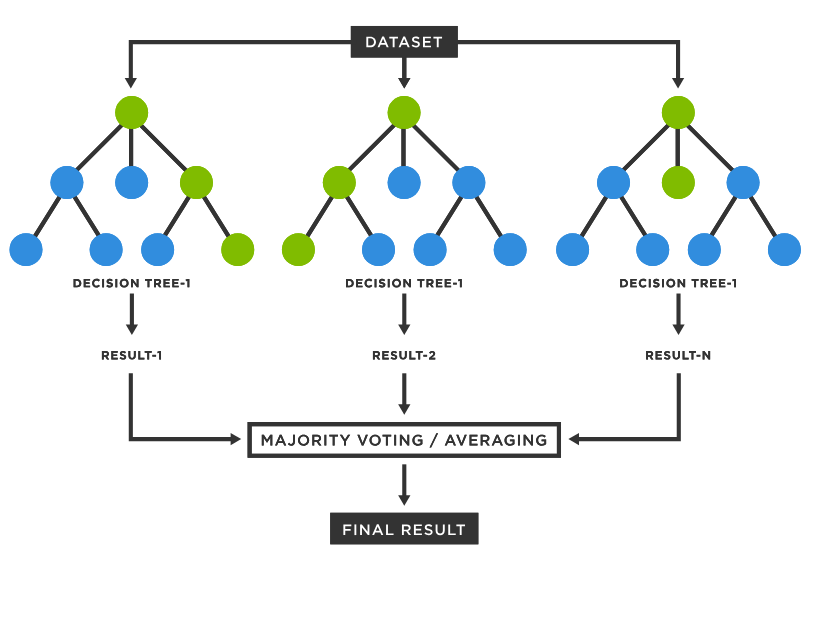

# **2. Advantages and disadvantages of Random Forest algorithm** 
<a class="anchor" id="2"></a>

Advantages:

- Random Forests have excellent predictive accuracy due to the ensemble of multiple decision trees.
- They handle a large number of features effectively and can handle both numerical and categorical data.
- Random Forests provide estimates of feature importance, which can aid in feature selection.
- They are resistant to overfitting and perform well on a wide range of datasets.
Disadvantages:

- Random Forests can be computationally expensive and require more memory compared to individual decision trees.
- The interpretability of the model is reduced because of the ensemble of trees.
- They may not perform well on datasets with high-dimensional, sparse data.
- Training a large number of trees can be time-consuming.



# **3. Feature selection with Random Forests** 
<a class="anchor" id="3"></a>

Random Forests can be used for feature selection by measuring the importance of each feature in the prediction process. The importance of a feature is calculated based on how much the performance of the model decreases when the feature is randomly permuted. Features that lead to a significant decrease in performance when permuted are considered important. This feature importance measure can help in identifying the most relevant features for a given task.

# **4. Difference between Random Forests and Decision-Trees** 
<a class="anchor" id="4"></a>

Random Forests and decision trees are both machine learning algorithms, but they differ in several aspects:

- Decision trees consist of a single tree structure, while Random Forests are an ensemble of multiple decision trees.
- Decision trees can suffer from overfitting, whereas Random Forests mitigate overfitting by averaging the predictions of multiple trees.
- Random Forests use random subsets of the training data and features during tree construction, making them more robust and less prone to biases.
- Decision trees are generally easier to interpret due to their single-tree structure, while Random Forests are more complex to interpret because of the ensemble of trees.
- Random Forests typically offer better predictive accuracy compared to individual decision trees, especially when dealing with complex datasets.

# **5. Why to choose Random Forest over Decision-Trees** 
<a class="anchor" id="5"></a>

There are several reasons why one might choose Random Forest over a single Decision Tree:

1. Improved predictive accuracy: Random Forests often provide better predictive accuracy compared to individual decision trees. By combining the predictions of multiple trees, Random Forests reduce the risk of overfitting and produce more robust and accurate results.

2. Reduced overfitting: Decision trees are prone to overfitting, especially when dealing with complex datasets. Random Forests mitigate this issue by aggregating the predictions of multiple trees, reducing the impact of individual noisy or outlier-prone trees. This ensemble approach helps to generalize better to unseen data.

3. Robust to missing data: Random Forests can handle missing data effectively. When making predictions, the algorithm uses only the available features, and missing values are handled without requiring imputation or preprocessing steps.

4. Handling high-dimensional data: Random Forests can handle datasets with a large number of features more effectively than decision trees. By randomly selecting a subset of features at each split, Random Forests can capture relevant information and reduce the impact of irrelevant or noisy features.

5. Feature importance estimation: Random Forests provide estimates of feature importance, which can aid in feature selection and understanding the relevance of different features in the prediction process. This information can be valuable for data analysis and model interpretation.

6. Robust to outliers: Random Forests are less sensitive to outliers compared to decision trees. Outliers have a lesser impact on the overall model due to the averaging effect of multiple trees.


# **6. Data Reading** 
<a class="anchor" id="6"></a>

In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
X_test = pd.read_csv('/kaggle/input/titanic/test.csv')
y_test = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
y_test.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# **7. Exploratory data analysis** 
<a class="anchor" id="7"></a>

In [7]:
df.shape

(891, 12)

- There are 891 rows and 12 columns 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.isnull().sum()/df.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

- There are null values in column name Age, Cabin and Embarked.
- Most of the null values present in Cabin column.

In [10]:
# first of all we will add the test and train data. 

# adding dependent variable and independent variable of test data
df1 = pd.concat([X_test, y_test.drop(['PassengerId'], axis = 1)], axis = 1)

# column place of Survived in train and test is different, fixing it

Sur = df['Survived']
df = df.drop(['Survived'], axis = 1)
df = pd.concat([df,Sur], axis = 1)

# merging both the train and test 

df = pd.concat([df, df1], axis = 0).reset_index()
df = df.drop(['index'], axis = 1)

In [11]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [12]:
df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0
1308,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,0


### Handling missing values

In [13]:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived          0
dtype: int64

- There are null values in column name Age, Cabin, Fare and Embarked.
- Most of the null values present in Cabin column.

#### Cabin

In [14]:
#we'll start off by dropping the Cabin feature since not a lot more useful information can be extracted from it.
df = df.drop(['Cabin'], axis = 1)

In [15]:
#we can also drop the Ticket feature since it's unlikely to yield any useful information
df = df.drop(['Ticket'], axis = 1)

#### Embarked

In [16]:
 df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

- Majority of people embarked in Southampton (S). Let's go ahead and fill in the missing values with S.

In [17]:
df['Embarked'] = df['Embarked'].fillna('S')

In [18]:
print(df[df['Embarked'] == 'S']['Fare'].mean())
print(df[df['Embarked'] == 'C']['Fare'].mean())
print(df[df['Embarked'] == 'Q']['Fare'].mean())

27.533755409836065
62.33626740740739
12.409012195121951


- There is lot of difference between the Average fare price for S, C and Q cabins.

- Missing value in Fare has cabin S, filling the Average value of Fare for S Cabin

#### Fare

In [19]:
df['Fare'] = df['Fare'].fillna(27.5337)

#### Age


- As there is no missing values in name, we will try something from name column to fill missing values in age

- Finding the Ages based on their name title

In [20]:
#extract a title for each Name in the train and test datasets

df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [21]:
# replacing females with most famous title
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Dr', 'Dona', 'Ms', 'Mme', 'Mlle'], 'Miss')

# replacing males with most famous title
df['Title'] = df['Title'].replace(['Capt', 'Col', 'Dr', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir' ], 'Mr')


In [22]:
df['Title'].value_counts()

Mr        775
Miss      276
Mrs       197
Master     61
Name: Title, dtype: int64

In [23]:
# Average age based on title 

print('median for Mr:', round(df[df['Title'] == 'Mr']['Age'].median(), 1))
print('mean for Mr:', round(df[df['Title'] == 'Mr']['Age'].mean(), 1))
print('median for Miss:', round(df[df['Title'] == 'Miss']['Age'].median(), 1))
print('mean for Miss:', round(df[df['Title'] == 'Miss']['Age'].mean(), 1))
print('median for Mrs:', round(df[df['Title'] == 'Mrs']['Age'].median(), 1))
print('mean for Mrs:', round(df[df['Title'] == 'Mrs']['Age'].mean(), 1))
print('median for Master:', round(df[df['Title'] == 'Master']['Age'].median(), 1))
print('mean for Master:', round(df[df['Title'] == 'Master']['Age'].mean(), 1))

median for Mr: 30.0
mean for Mr: 32.7
median for Miss: 22.0
mean for Miss: 22.8
median for Mrs: 35.5
mean for Mrs: 37.0
median for Master: 4.0
mean for Master: 5.5


- As there is no significance difference between mean and median, hence we can replace null values using mean.

In [24]:
mean_age_mr = round(df[df['Title'] == 'Mr']['Age'].mean(), 1)
mean_age_miss = round(df[df['Title'] == 'Miss']['Age'].mean(), 1)
mean_age_mrs = round(df[df['Title'] == 'Mrs']['Age'].mean(), 1)
mean_age_master = round(df[df['Title'] == 'Master']['Age'].mean(), 1)
df.loc[df['Title'] == 'Mr', 'Age'] = df.loc[df['Title'] == 'Mr', 'Age'].fillna(mean_age_mr)
df.loc[df['Title'] == 'Miss', 'Age'] = df.loc[df['Title'] == 'Miss', 'Age'].fillna(mean_age_miss)
df.loc[df['Title'] == 'Mrs', 'Age'] = df.loc[df['Title'] == 'Mrs', 'Age'].fillna(mean_age_mrs)
df.loc[df['Title'] == 'Master', 'Age'] = df.loc[df['Title'] == 'Master', 'Age'].fillna(mean_age_master)

In [25]:
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Survived       0
Title          0
dtype: int64

- Now we have no missing values. All set

In [26]:
#drop the name feature since it contains no more useful information.
df = df.drop(['Name'], axis = 1)

In [27]:
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title
0,1,3,male,22.0,1,0,7.2500,S,0,Mr
1,2,1,female,38.0,1,0,71.2833,C,1,Mrs
2,3,3,female,26.0,0,0,7.9250,S,1,Miss
3,4,1,female,35.0,1,0,53.1000,S,1,Mrs
4,5,3,male,35.0,0,0,8.0500,S,0,Mr


In [28]:
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
df['Sex'] = df['Sex'].map(sex_mapping)

In [29]:
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
df['Embarked'] = df['Embarked'].map(embarked_mapping)

In [30]:
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.377049
1,Miss,0.782609
2,Mr,0.108387
3,Mrs,0.868020


- As Expected, female has more survival rate as compared to mens.
- Also Title is important feature on survival rate, we cant ignore it.

In [31]:
title_mapping = {"Mrs": 1, "Miss": 2, "Master": 3, "Mr" : 4}
df['Title'] = df['Title'].map(title_mapping)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Sex          1309 non-null   int64  
 3   Age          1309 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Fare         1309 non-null   float64
 7   Embarked     1309 non-null   int64  
 8   Survived     1309 non-null   int64  
 9   Title        1309 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 102.4 KB


- no missing values
- no categorical values

In [33]:
df[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean()

,Fare,Survived
0,0.0000,0.058824
1,3.1708,0.000000
2,4.0125,0.000000
3,5.0000,0.000000
4,6.2375,0.000000
...,...,...
277,227.5250,0.600000
278,247.5208,0.666667
279,262.3750,0.714286
280,263.0000,0.666667


- More fare implies more survival rate

# **8. Split data into separate training and test set** 
<a class="anchor" id="8"></a>

In [34]:
# from pasanger ID 892 we have test data 

train = df.iloc[:891].reset_index()
train = train.drop(['index'], axis = 1)
test = df.iloc[891:].reset_index()
test = test.drop(['index'], axis = 1)

In [35]:
X_train = train.drop(['PassengerId', 'Survived'], axis = 1)
y_train = train['Survived']
X_test = test.drop(['PassengerId', 'Survived'], axis = 1)
y_test = test['Survived']

# **9. Model Training** 
<a class="anchor" id="9"></a>

In [36]:
# without hypertunning
Model = RandomForestClassifier()

In [37]:
Model

RandomForestClassifier()

In [38]:
Model.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
y_pred = Model.predict(X_test)

In [40]:
print('Accuracy rate is :',accuracy_score(y_test, y_pred))
print('Confusion Matrix : \n',confusion_matrix(y_test, y_pred))
print('Classification report : \n', classification_report(y_test,y_test))

Accuracy rate is : 0.8086124401913876
Confusion Matrix : 
 [[225  41]
 [ 39 113]]
Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       152

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418



In [41]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(rf, param_grid, n_iter=10, cv=5, random_state=42)

In [42]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42)

In [43]:
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=10,
                       n_estimators=200)

In [44]:
y_pred = best_model.predict(X_test)

In [45]:
print('Accuracy rate is :',accuracy_score(y_test, y_pred))
print('Confusion Matrix : \n',confusion_matrix(y_test, y_pred))
print('Classification report : \n', classification_report(y_test,y_test))

Accuracy rate is : 0.8708133971291866
Confusion Matrix : 
 [[240  26]
 [ 28 124]]
Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       152

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418



In [46]:
ids = test['PassengerId']
predictions = best_model.predict(X_test)

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)